# Thera Bank Personal Loan Campaign

## Data Description

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain

Banking

## Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (thousands)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (thousands)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (thousands)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## Learning Outcomes

* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## Objectives

The classification goal is to predict the likelihood of a liability customer buying a personal loan

## Steps and tasks

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (**5 marks**)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (**20 marks**)
   * Number of unique in each column?
   * Number of people with zero mortgage?
   * Number of people with zero credit card spending per month?
   * Value counts of all categorical columns.
   * Univariate and Bivariate
   * Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (**5 marks**)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (**15 marks**)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (**10 marks**)
6. Give conclusion related to the Business understanding of your model? (**5 marks**)

## Submitted Work

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (**5 marks**)

In [1]:
# Import libraries
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import LinearRegression

%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

sns.set(color_codes=True)
sns.set_style(style="darkgrid")

In [2]:
# Import dataset
raw_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Review datatypes, statistical summary, shape, null values, imputations
raw_data.info()
raw_data.shape
raw_data.head(10)
raw_data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


False

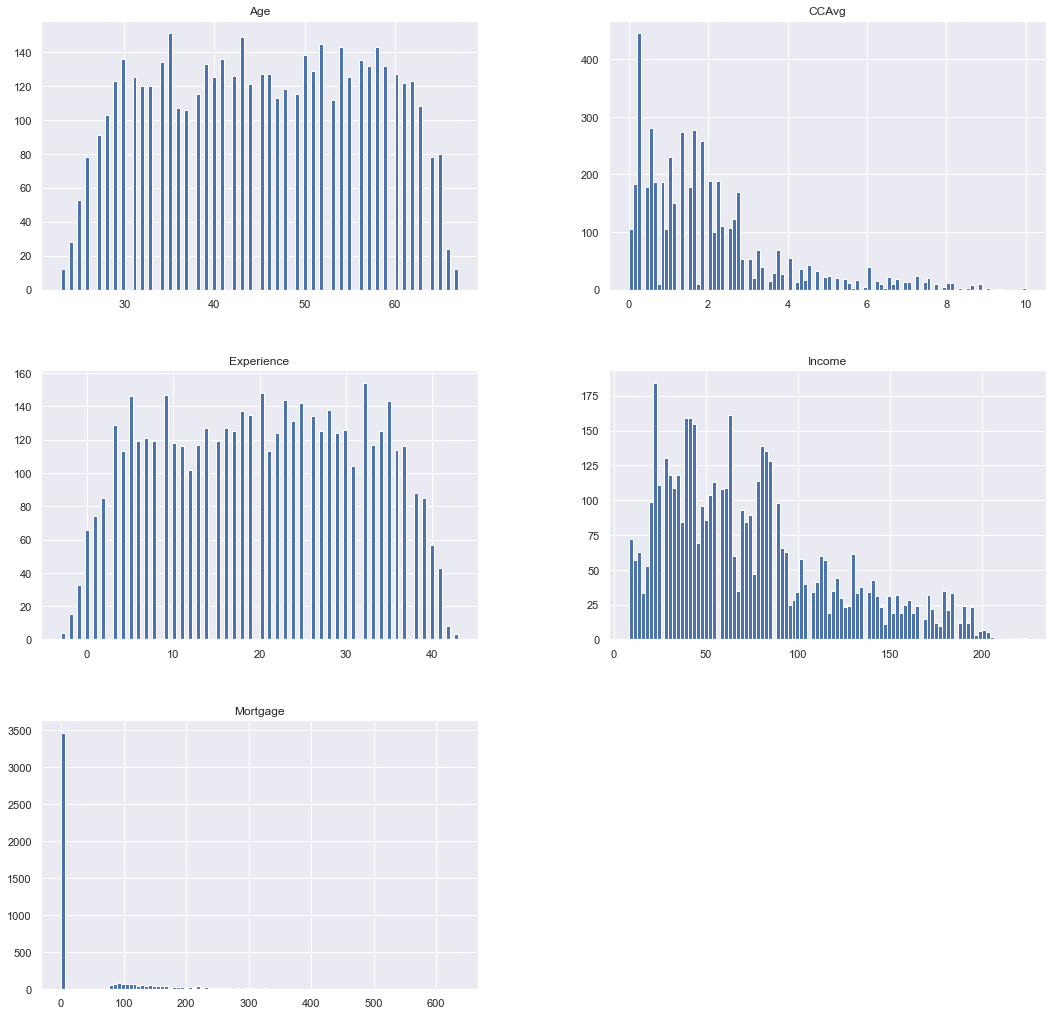

In [4]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
raw_data[columns].hist(stacked=False, bins=100, figsize=(18,50), layout=(8,2));

In [5]:
raw_data[columns].describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


2. EDA: Study the data distribution in each attribute and target variable, share your findings (**20 marks**)
   * Number of unique in each column?
   * Number of people with zero mortgage?
   * Number of people with zero credit card spending per month?
   * Value counts of all categorical columns.
   * Univariate and Bivariate
   * Get data model ready

In [6]:
# Number of unique values in each column
raw_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [7]:
# Number of people with zero mortgage
raw_data.loc[raw_data['Mortgage'] == 0].shape[0]

3462

In [8]:
# Number of people with zero credit card spending per month
raw_data.loc[raw_data['CCAvg'] == 0].shape[0]

106

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Family Size Frequency')

Text(-0.25, 1473, '1472')

Text(0.75, 1297, '1296')

Text(1.75, 1011, '1010')

Text(2.75, 1223, '1222')

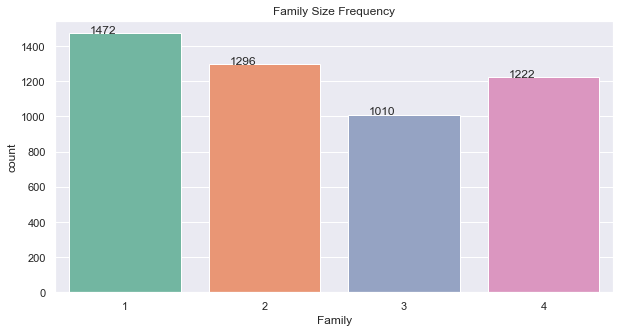

In [9]:
# Value counts of all categorical columns
plt.figure(figsize=(10,5))
plt.title('Family Size Frequency')
ax = sns.countplot(raw_data['Family'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Education Frequency')

Text(-0.25, 2097, '2096')

Text(0.75, 1404, '1403')

Text(1.75, 1502, '1501')

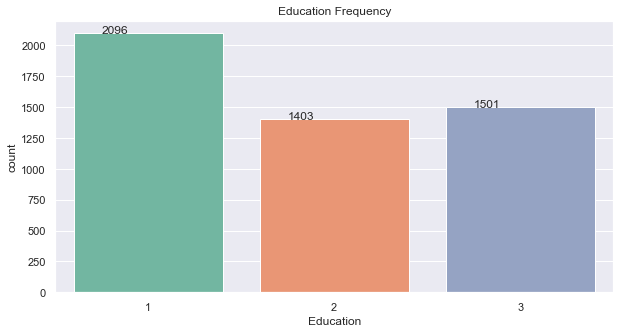

In [10]:
plt.figure(figsize=(10,5))
plt.title('Education Frequency')
ax = sns.countplot(raw_data['Education'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Securities Account Frequency')

Text(-0.25, 4479, '4478')

Text(0.75, 523, '522')

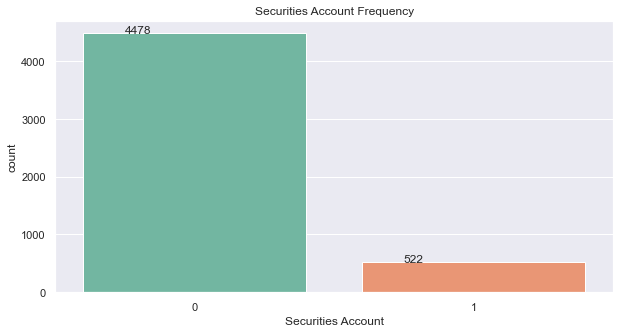

In [11]:
plt.figure(figsize=(10,5))
plt.title('Securities Account Frequency')
ax = sns.countplot(raw_data['Securities Account'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'CD Account Frequency')

Text(-0.25, 4699, '4698')

Text(0.75, 303, '302')

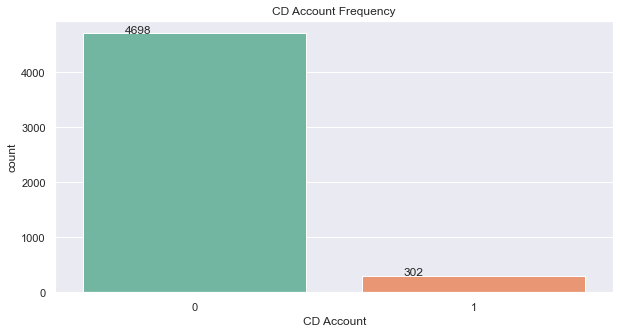

In [12]:
plt.figure(figsize=(10,5))
plt.title('CD Account Frequency')
ax = sns.countplot(raw_data['CD Account'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Internet Banking Use Frequency')

Text(-0.25, 2017, '2016')

Text(0.75, 2985, '2984')

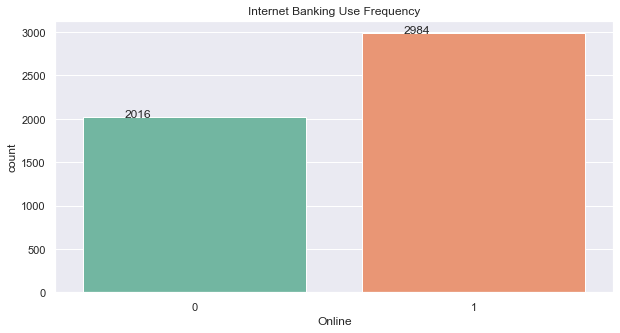

In [13]:
plt.figure(figsize=(10,5))
plt.title('Internet Banking Use Frequency')
ax = sns.countplot(raw_data['Online'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'In-House Credit Card Frequency')

Text(-0.25, 3531, '3530')

Text(0.75, 1471, '1470')

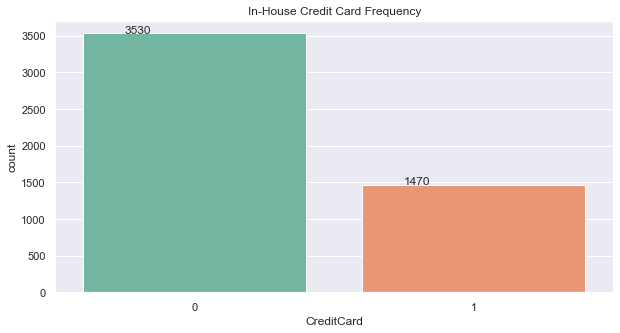

In [14]:
plt.figure(figsize=(10,5))
plt.title('In-House Credit Card Frequency')
ax = sns.countplot(raw_data['CreditCard'], palette="Set2")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

### Univariate analyses

#### Age

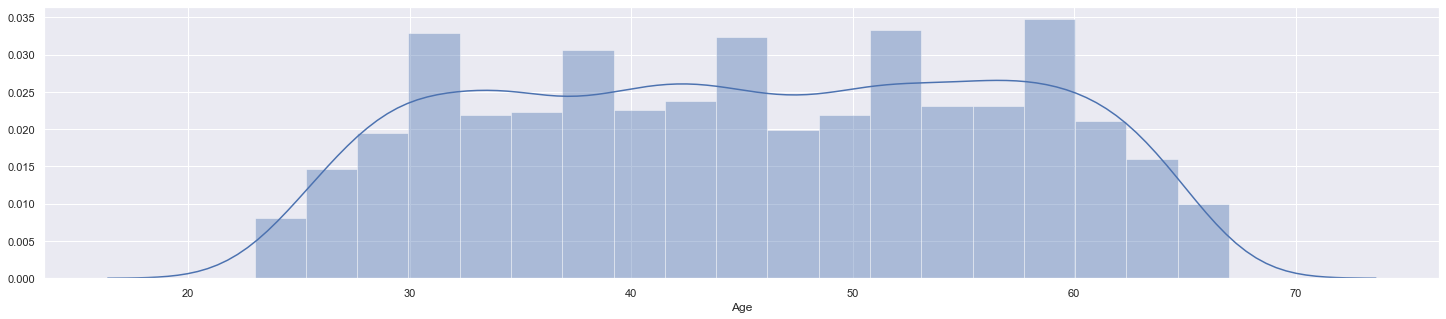

In [15]:
plt.figure(figsize=(25,5))
sns.distplot(raw_data['Age']);

In [16]:
raw_data['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

#### Experience

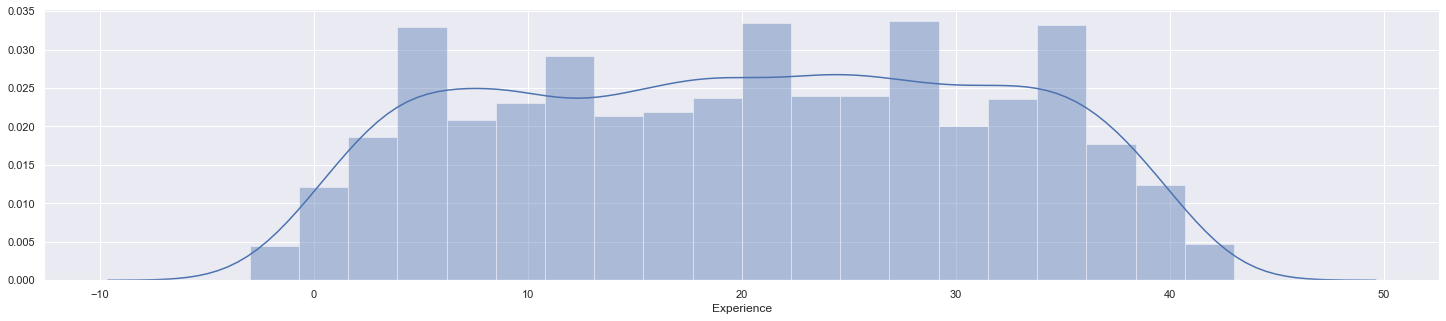

In [17]:
plt.figure(figsize=(25,5))
sns.distplot(raw_data['Experience']);

In [18]:
raw_data['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [19]:
# Experience shouldn't have a negative value, so see if there are any other weird values
raw_data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

#### Income

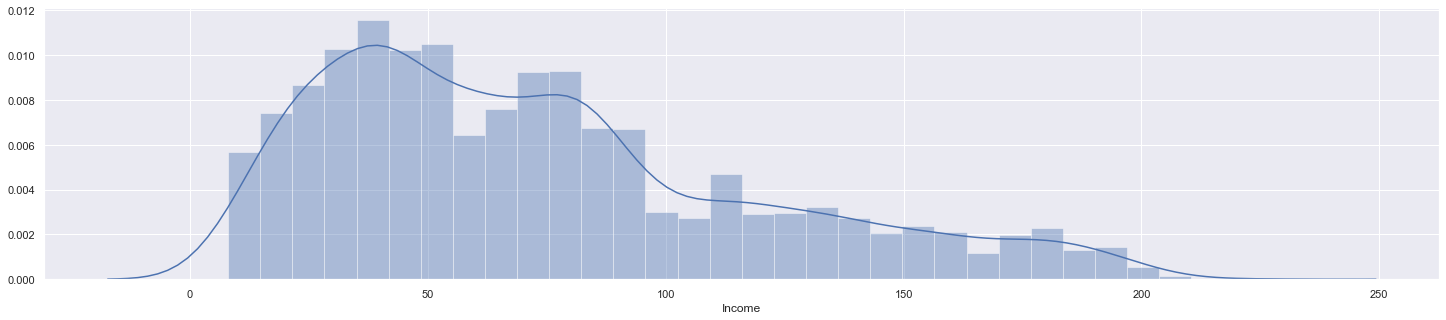

In [20]:
plt.figure(figsize=(25,5))
sns.distplot(raw_data['Income']);

In [21]:
raw_data['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

#### Family size

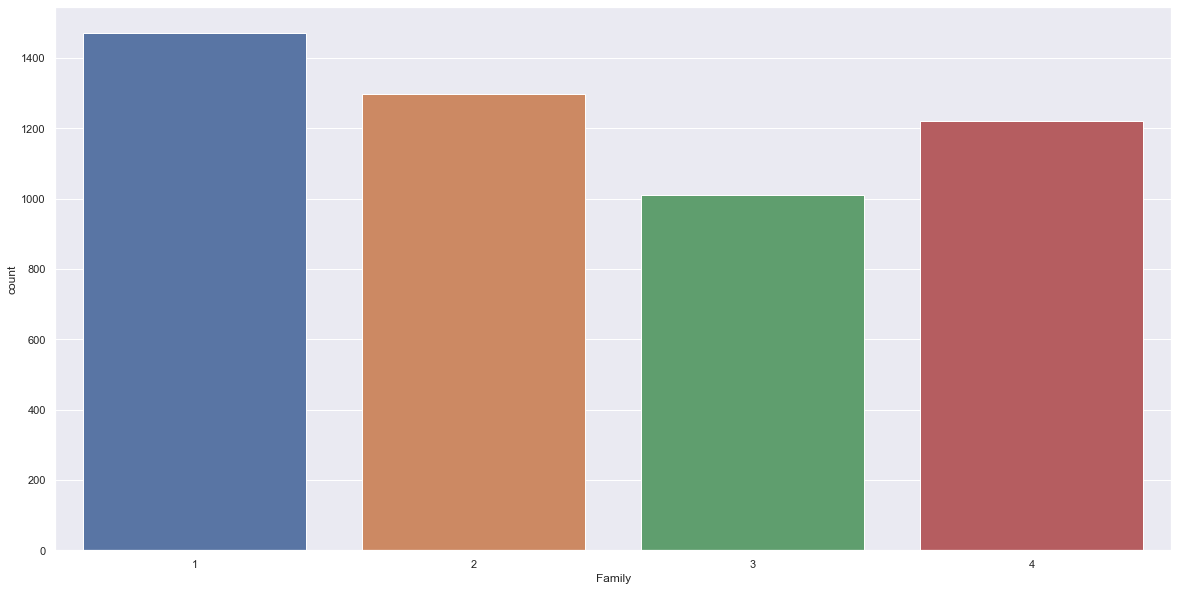

In [22]:
plt.figure(figsize=(20,10))
ax = sns.countplot(raw_data['Family']);

In [23]:
raw_data['Family'].describe()

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

#### CCAvg

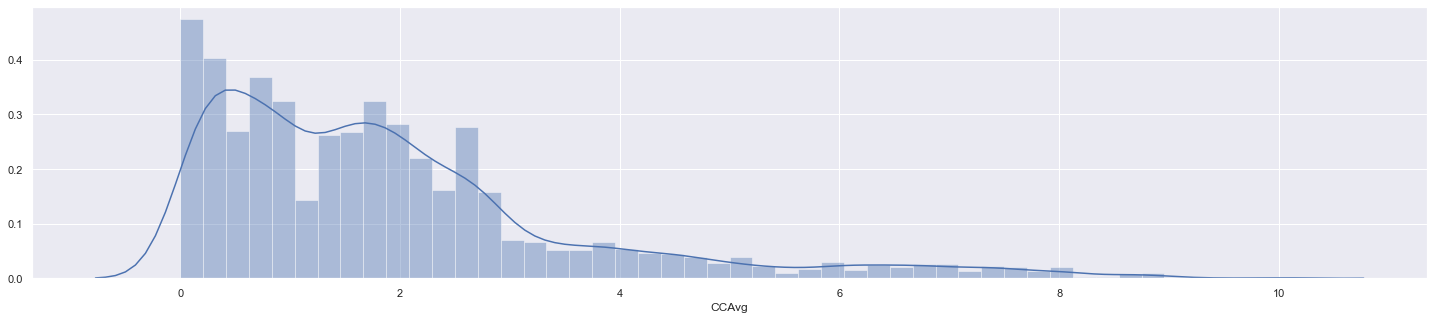

In [24]:
plt.figure(figsize=(25,5))
sns.distplot(raw_data['CCAvg']);

In [25]:
raw_data['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

#### Education

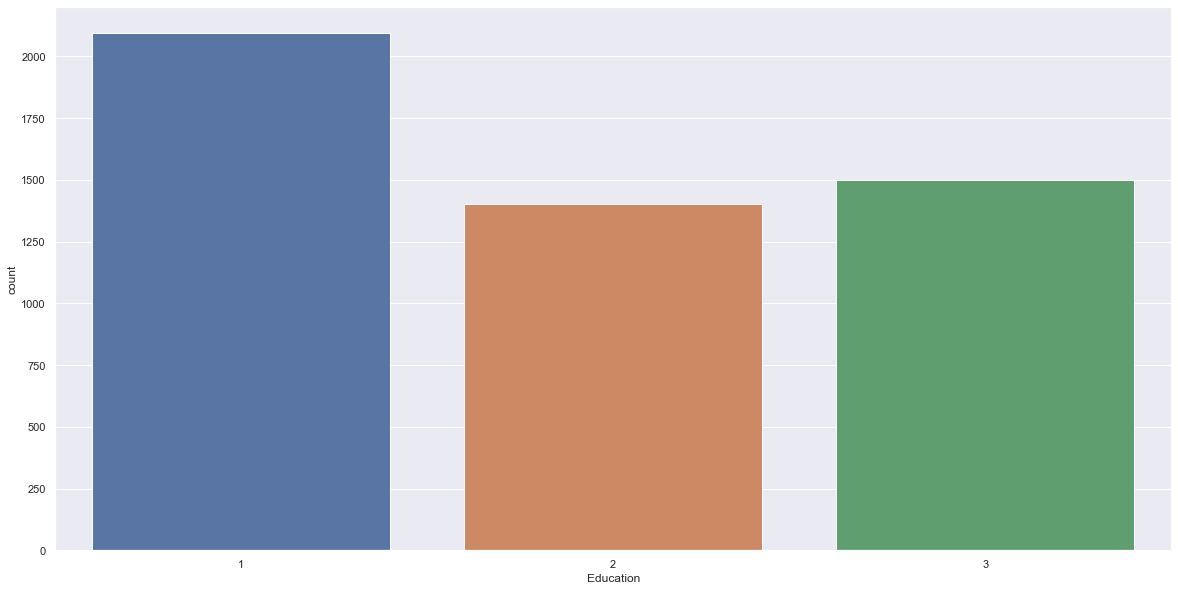

In [26]:
plt.figure(figsize=(20,10))
ax = sns.countplot(raw_data['Education']);

#### Mortgage

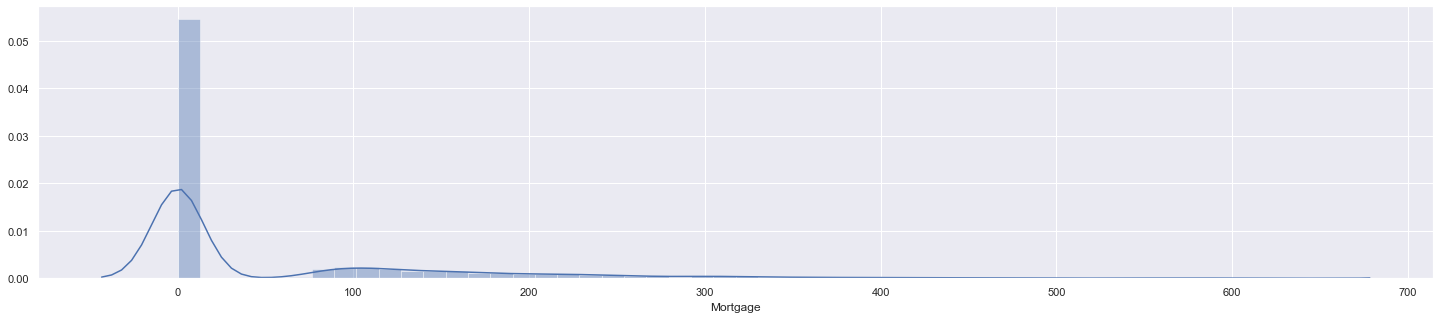

In [27]:
plt.figure(figsize=(25,5))
sns.distplot(raw_data['Mortgage']);

In [28]:
raw_data['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

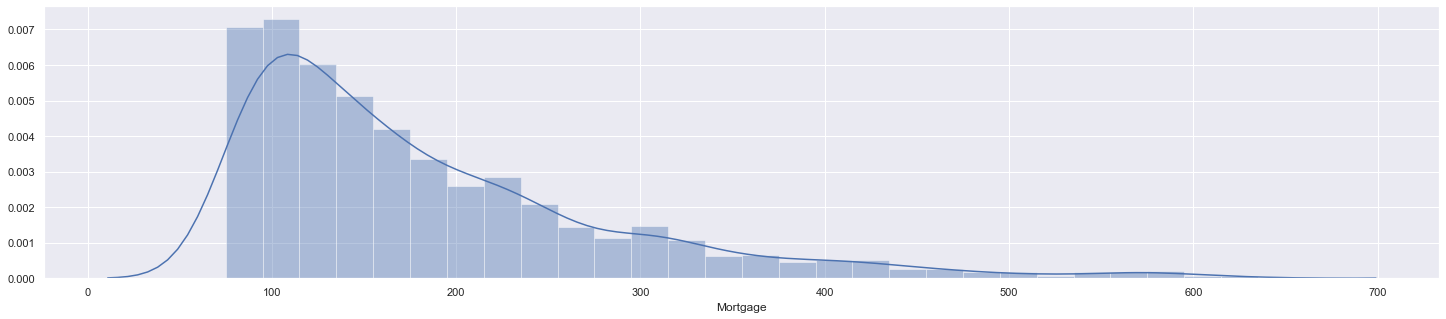

In [29]:
# Also remove 0 to get a better look at the non-zero data
# Any actual analysis will be on the real dataset (with 0)
plt.figure(figsize=(25,5))
mortgage_no_zero = copy.copy(raw_data['Mortgage'])
mortgage_no_zero.replace(0, np.nan, inplace=True)

sns.distplot(mortgage_no_zero);

In [30]:
mortgage_no_zero.describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

### Bivariate analyses

In [31]:
raw_data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


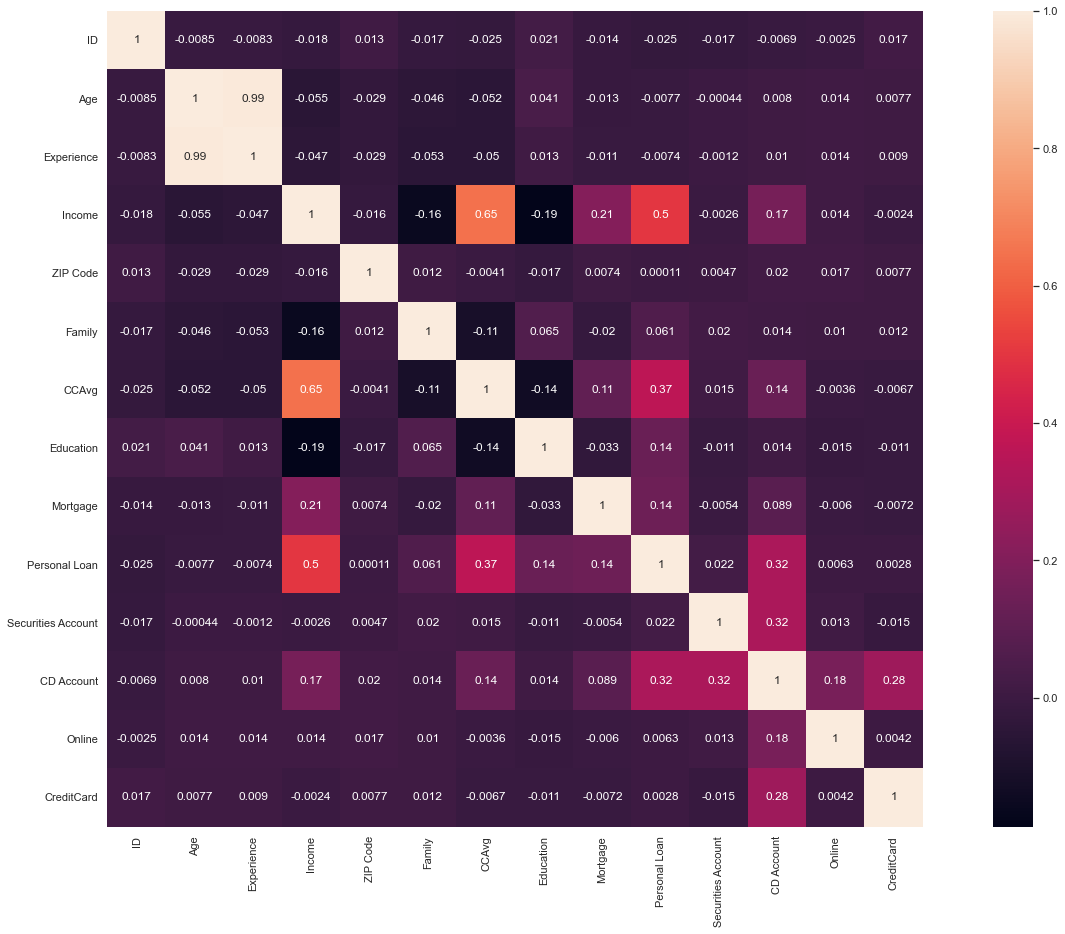

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(raw_data.corr(), annot=True, square=True);

C:\Users\pcopley\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pcopley\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pcopley\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


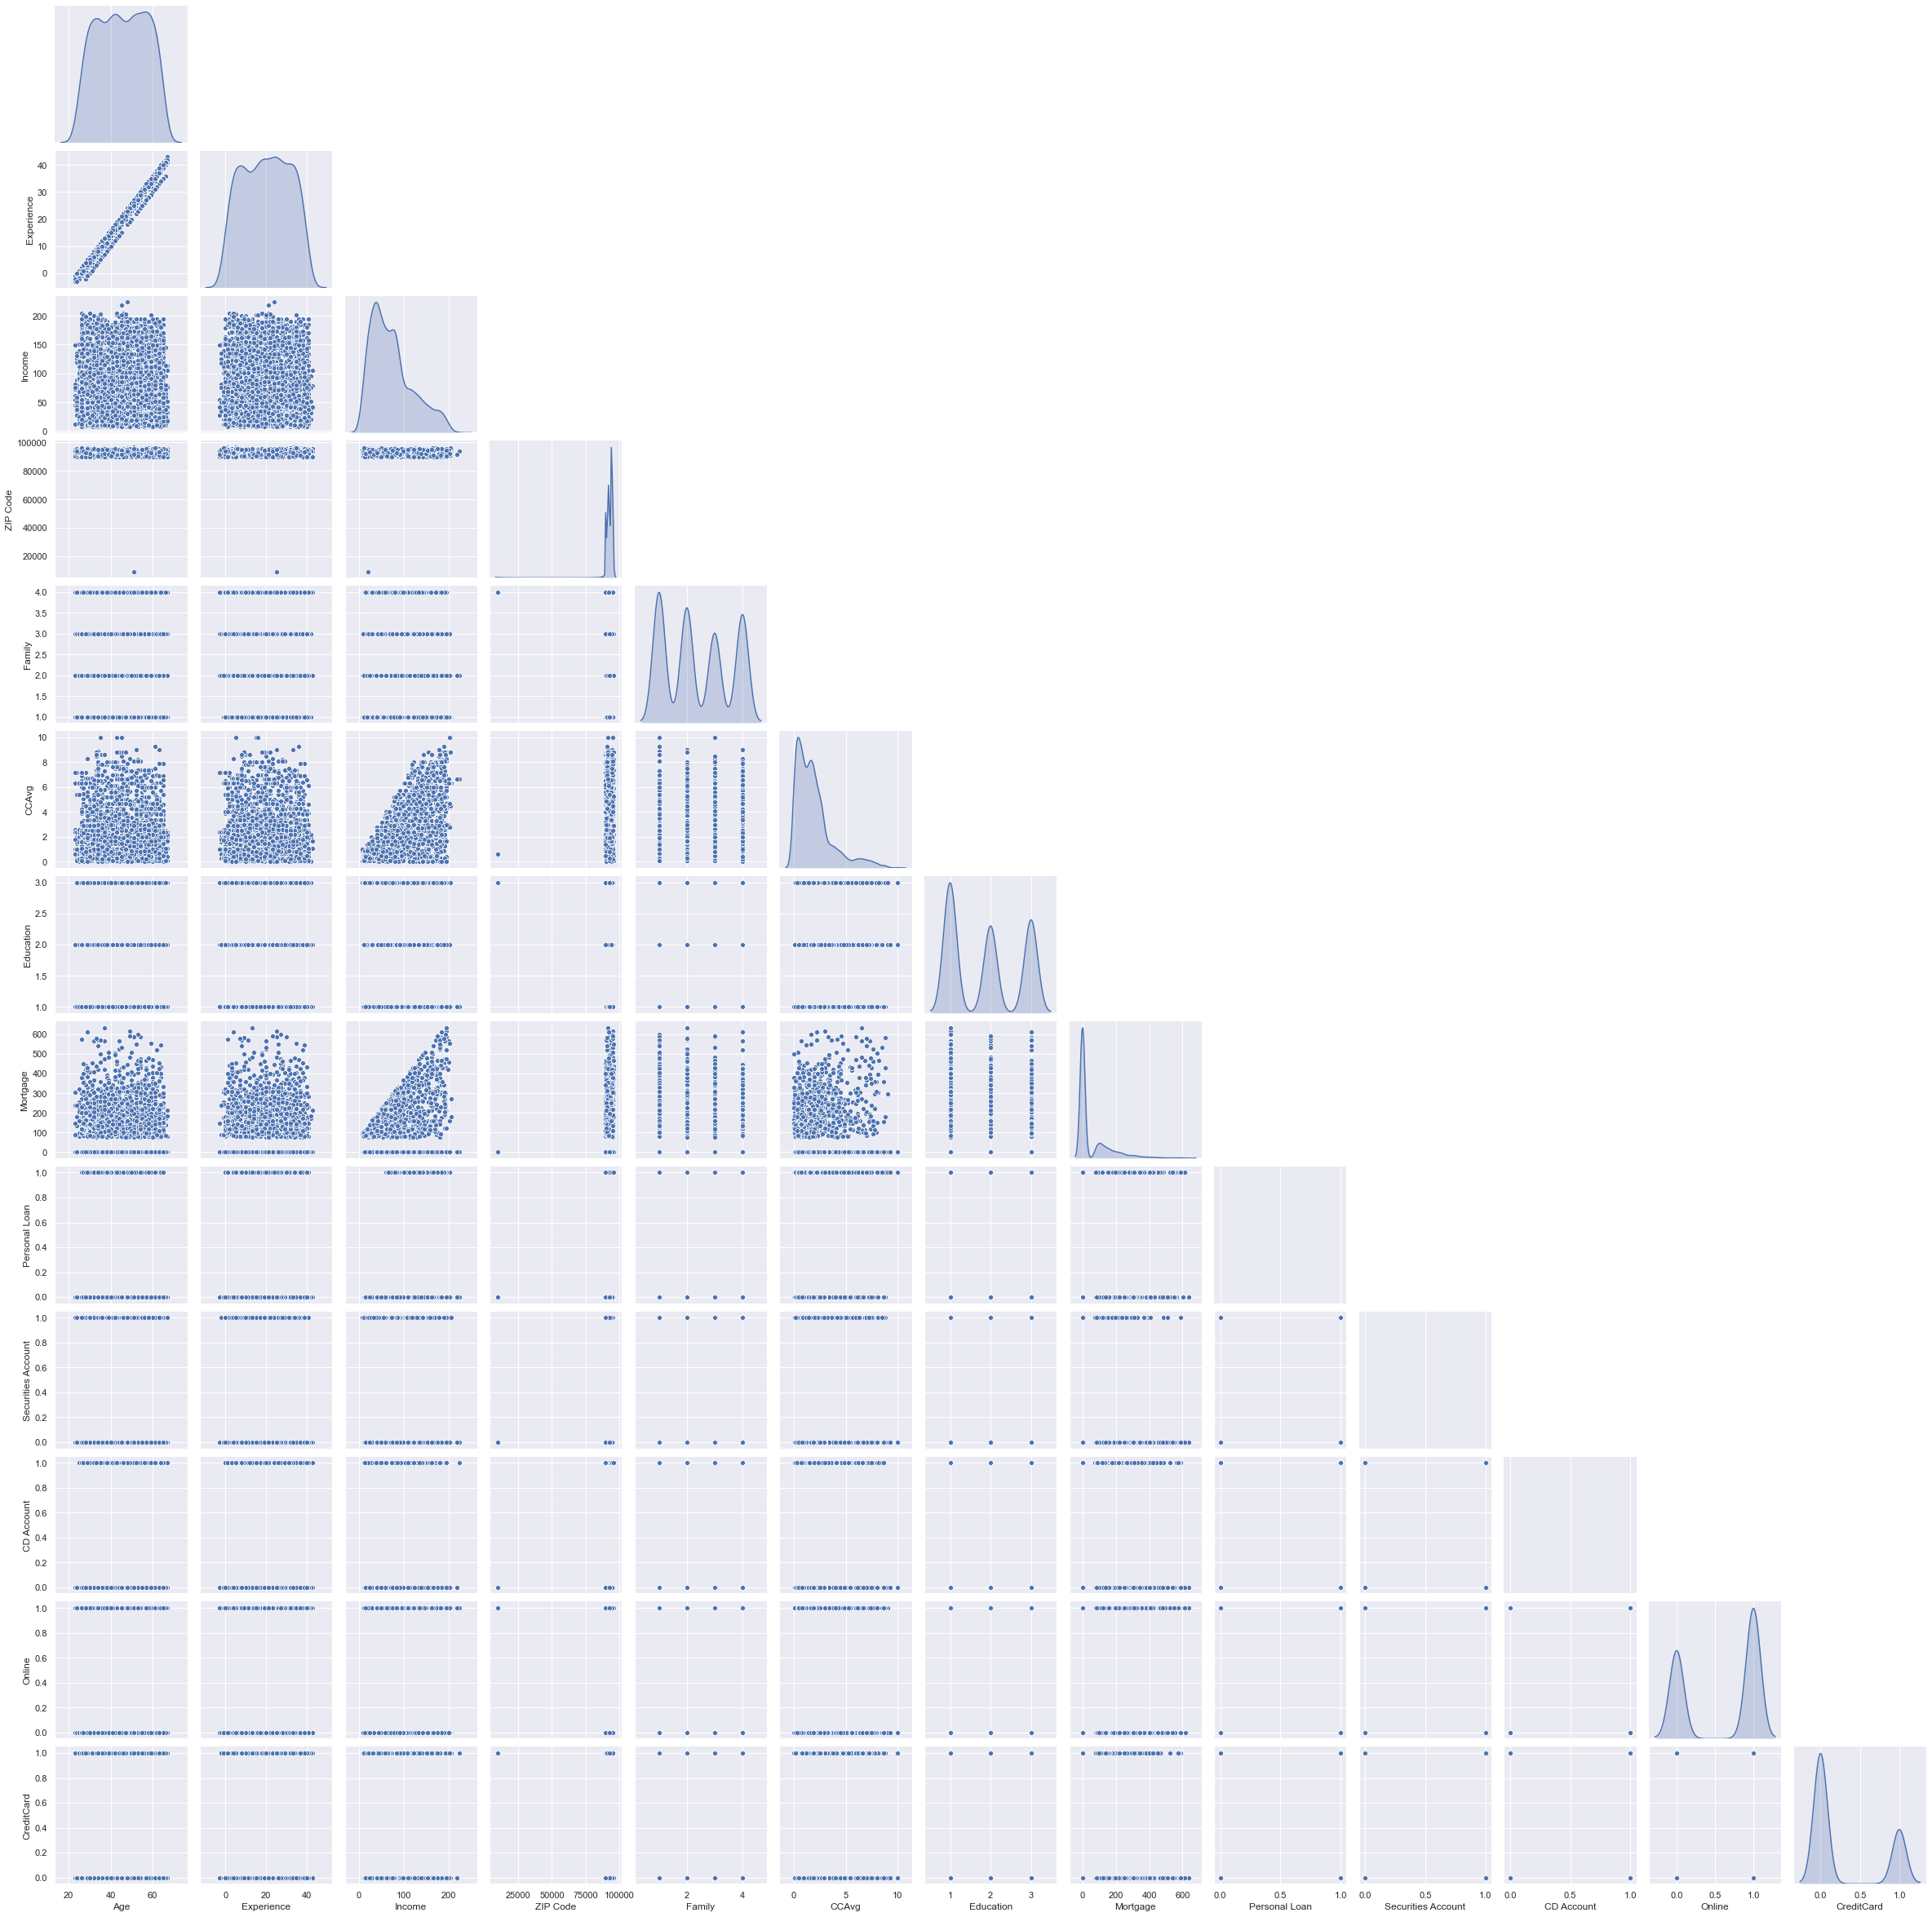

In [33]:
sns.pairplot(raw_data[['Age','Experience','Income','ZIP Code',
                       'Family','CCAvg','Education','Mortgage',
                       'Personal Loan','Securities Account',
                       'CD Account','Online','CreditCard']], diag_kind='kde', corner=True);

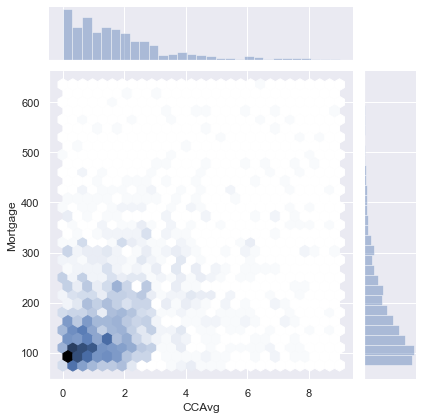

In [34]:
# Any relation between non-zero mortgages and CCAvg?
sns.jointplot(raw_data['CCAvg'], mortgage_no_zero, kind="hex");

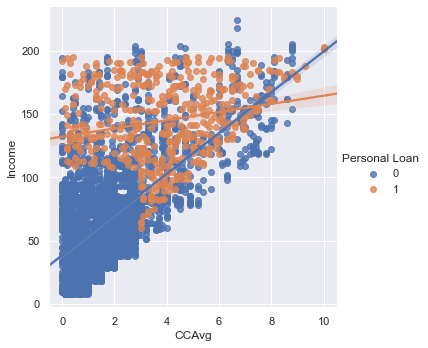

In [35]:
# This shows us an interesting segment that does *not* get personal loans
sns.lmplot(y="Income", x="CCAvg", hue="Personal Loan", data=raw_data, truncate=False);

### Data model preparation

In [36]:
# Data model preparation
# Create another copy of the object
data = copy.deepcopy(raw_data)

# Replace negative experience values with mean
# If we had more than a couple values we would use a different approach and replace anything < 0
data['Experience'].unique()

exp_mean = data['Experience'].mean()

data['Experience'].replace([-1,-2,-3], exp_mean, inplace=True)

data['Experience'].unique()

data.drop(['ID'], axis=1, inplace=True)

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

array([ 1.    , 19.    , 15.    ,  9.    ,  8.    , 13.    , 27.    ,
       24.    , 10.    , 39.    ,  5.    , 23.    , 32.    , 41.    ,
       30.    , 14.    , 18.    , 21.    , 28.    , 31.    , 11.    ,
       16.    , 20.    , 35.    ,  6.    , 25.    ,  7.    , 12.    ,
       26.    , 37.    , 17.    ,  2.    , 36.    , 29.    ,  3.    ,
       22.    , 20.1046, 34.    ,  0.    , 38.    , 40.    , 33.    ,
        4.    , 42.    , 43.    ])

3. Split the data into training and test set in the ratio of 70:30 respectively (**5 marks**)

In [37]:
X = data.drop('Personal Loan', axis=1)
Y = data['Personal Loan']

x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22.0,35,94304,2,1.3,1,0,0,0,1,0
4768,38,14.0,39,93118,1,2.0,2,0,0,0,1,0
65,59,35.0,131,91360,1,3.8,1,0,0,0,1,1
177,29,3.0,65,94132,4,1.8,2,244,0,0,0,0
4489,39,13.0,21,95518,3,0.2,2,0,0,0,1,0


In [38]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [39]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)


4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (**15 marks**)

In [40]:
model = lr(solver="liblinear")
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

coef_df

LogisticRegression(solver='liblinear')

,0,1,2,3,4,5,6,7,8,9,10,11,intercept
0,0.000095,-0.005622,0.036052,-0.000065,0.014864,0.00928,0.016122,0.000831,0.000524,0.00459,-0.000173,-0.000065,-0.000103


In [41]:
model_score = model.score(x_test, y_test)
model_score

0.9073333333333333

### Confusion Matrix

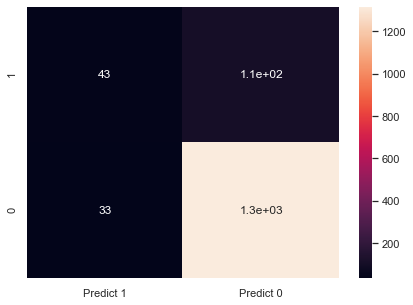

In [42]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ["1", "0"]],
                     columns=[i for i in ["Predict 1", "Predict 0"]])

plt.figure(figsize=(7,5))

sns.heatmap(df_cm, annot=True);

### Precision, Recall, F1, ROC_AUC

In [43]:
def calc_precision(tp, fp):
    return tp/(tp+fp)

def calc_recall(tp, fn):
    return tp/(tp+fn)

def calc_f1(tp, fp, fn):
    p = calc_precision(tp, fp)
    r = calc_recall(tp, fn)
    return 2*((p*r)/(p+r))

In [44]:
# True positives - predicted loan, got loan
tp = 43

# False positive - predicted loan, no loan
fp = 33

# True negative - predicted no loan, no loan
tn = 1318

# False negative - predicted no loan, got loan
fn = 106

precision = calc_precision(tp, fp)
recall = calc_recall(tp, fn)
f1 = calc_f1(tp, fp, fn)

print("Precision: %.3f" % (precision*100))
print("Recall: %.3f" % (recall*100))
print("F1: %.3f" % (f1*100))

Precision: 56.579
Recall: 28.859
F1: 38.222


In [45]:
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:,1]
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

print('Chance: ROC AUC=%.3f' % (ns_auc*100))
print('Model: ROC AUC=%.3f' % (lr_auc*100))

Chance: ROC AUC=50.000
Model: ROC AUC=91.520


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

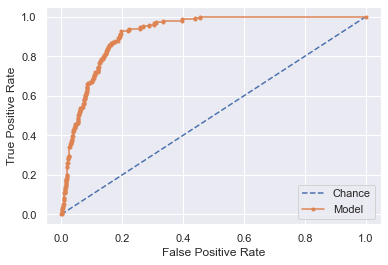

In [46]:
# Calculate ROC curve for model and plot

ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Chance')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (**10 marks**)

In [47]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}.".format(col_name, regression_model.coef_[idx]))

LinearRegression()

The coefficient for Age is 0.0024284179438345227.
The coefficient for Experience is -0.002342164710711001.
The coefficient for Income is 0.0028156422864165.
The coefficient for ZIP Code is 1.427331984261191e-06.
The coefficient for Family is 0.03306134079103795.
The coefficient for CCAvg is 0.016662979733286034.
The coefficient for Education is 0.07243597068326962.
The coefficient for Mortgage is 8.768054316915804e-05.
The coefficient for Securities Account is -0.07136695614929779.
The coefficient for CD Account is 0.33061716022408355.
The coefficient for Online is -0.025125681875303098.
The coefficient for CreditCard is -0.045393560964162354.


In [48]:
x_train.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.435429,20.460398,73.640000,93154.421429,2.395143,1.934306,1.886286,56.054857,0.104571,0.062571,0.591143,0.297429
std,11.507821,11.267558,46.168251,2259.694861,1.145654,1.734706,0.839634,100.523942,0.306044,0.242225,0.491693,0.457192
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91910.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.104600,63.000000,93555.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.250000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
pred_obs = copy.copy(x_test)
pred_obs['Predicted'] = y_predict
pred_obs['Actual'] = y_test

In [50]:
# Show false positives
pred_pos = pred_obs[pred_obs['Predicted'] == 1]

pred_pos[pred_pos['Actual'] == 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted,Actual
1513,45,21.0,183,95211,2,1.40,1,354,0,0,0,0,1,0
1626,31,6.0,180,93108,2,6.70,1,0,0,0,0,0,1,0
4284,38,13.0,173,94305,2,3.30,1,243,0,0,0,0,1,0
2636,38,13.0,179,93943,1,4.10,1,0,0,0,1,0,1,0
1552,29,5.0,195,94301,1,4.30,1,0,0,0,0,0,1,0
2478,30,5.0,178,94063,2,6.70,1,0,0,0,0,0,1,0
1277,45,20.0,194,92110,2,8.80,1,428,0,0,0,0,1,0
684,43,17.0,164,90266,1,2.40,1,449,0,0,1,0,1,0
544,35,10.0,164,91614,2,7.80,1,0,0,0,1,0,1,0
2852,54,29.0,183,93105,1,8.10,1,0,0,0,1,1,1,0


In [51]:
# Show false negatives
pred_neg = pred_obs[pred_obs['Predicted'] == 0]

pred_neg[pred_neg['Actual'] == 1]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Predicted,Actual
4377,33,8.0,145,92507,1,2.7,3,0,0,0,1,0,0,1
3988,59,35.0,85,91330,1,3.4,3,0,0,1,0,1,0,1
3271,52,27.0,93,90291,4,4.1,2,0,0,0,0,1,0,1
349,26,2.0,60,93407,2,3.0,1,132,0,0,0,0,0,1
927,65,40.0,95,95014,3,3.7,2,138,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,59,35.0,108,90245,4,3.8,2,304,0,0,1,0,0,1
351,28,4.0,155,92182,4,5.3,2,0,0,0,1,0,0,1
421,28,3.0,115,92333,4,3.1,2,0,0,0,0,0,0,1
4008,61,31.0,154,94555,3,7.5,3,351,0,1,1,1,0,1


6. Give conclusion related to the Business understanding of your model? (**5 marks**)

Presumably outreach to solicit personal loan applications is low cost for Thera Bank, so false positives are not a large concern. However, the nearly 2x higher false negative rate would make me hesitate to use this model in production. Over 7% of the test dataset that did get a loan would have been excluded from outreach.

That being said, if you are optimizing for success rate, over half of those predicted to get a personal loan did.